In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from datetime import datetime


from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

In [2]:
def import_data():
    raw_data_df = pd.read_csv("data_clustering.csv",delimiter=',')
    return raw_data_df

In [3]:
result = import_data()

In [4]:
result.tail()

,Horodatage,Values
305407,2019-10-23T23:10,246475
305408,2019-10-23T23:20,250097
305409,2019-10-23T23:30,247039
305410,2019-10-23T23:40,247972
305411,2019-10-23T23:50,246582


In [5]:
print(result.info())
result['Horodatage'] =  pd.to_datetime(result['Horodatage'], format='%Y-%m-%d''T''%H:%M')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305412 entries, 0 to 305411
Data columns (total 2 columns):
Horodatage    305412 non-null object
Values        305412 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.7+ MB
None


In [6]:
result.tail()

,Horodatage,Values
305407,2019-10-23 23:10:00,246475
305408,2019-10-23 23:20:00,250097
305409,2019-10-23 23:30:00,247039
305410,2019-10-23 23:40:00,247972
305411,2019-10-23 23:50:00,246582


In [7]:
#result['Horodatage'] =  pd.to_datetime(result['Horodatage'], format='%d/%m/%Y %H:%M')
date_column = []
for date in result['Horodatage']:
    datetimeobject = datetime.strftime(date,'%d/%m/%y %H:%M:%S')
    date_column.append(datetimeobject)

In [8]:
data = result.loc[:,['Values']]
data = data.set_index(result.Horodatage)
data['Values'] = pd.to_numeric(data['Values'],downcast='float',errors='coerce')

In [9]:
data.tail()

,Values
Horodatage,
2019-10-23 23:10:00,246475.0
2019-10-23 23:20:00,250097.0
2019-10-23 23:30:00,247039.0
2019-10-23 23:40:00,247972.0
2019-10-23 23:50:00,246582.0


## Tracé de figure des puissances en fonction de la date

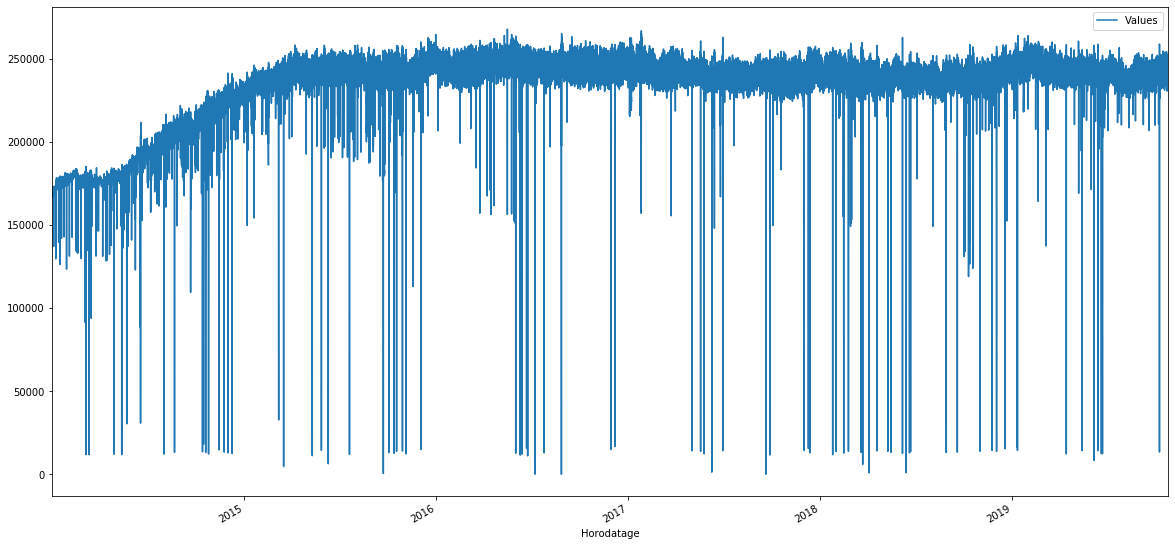

In [10]:
data.plot(figsize=(20,10))

# Rééchantillonnage des données par année 

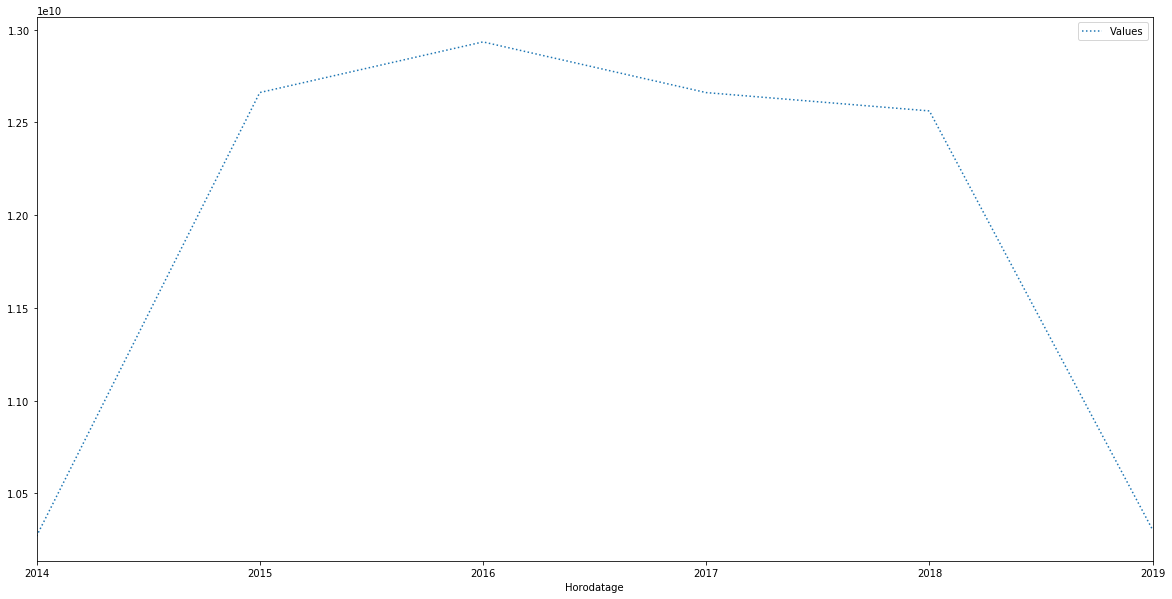

In [11]:
Year_end = data.resample('A').sum()
Year_end.plot(style=[':','--','-'],figsize=(20,10))

# Rééchantillonnage des données par mois

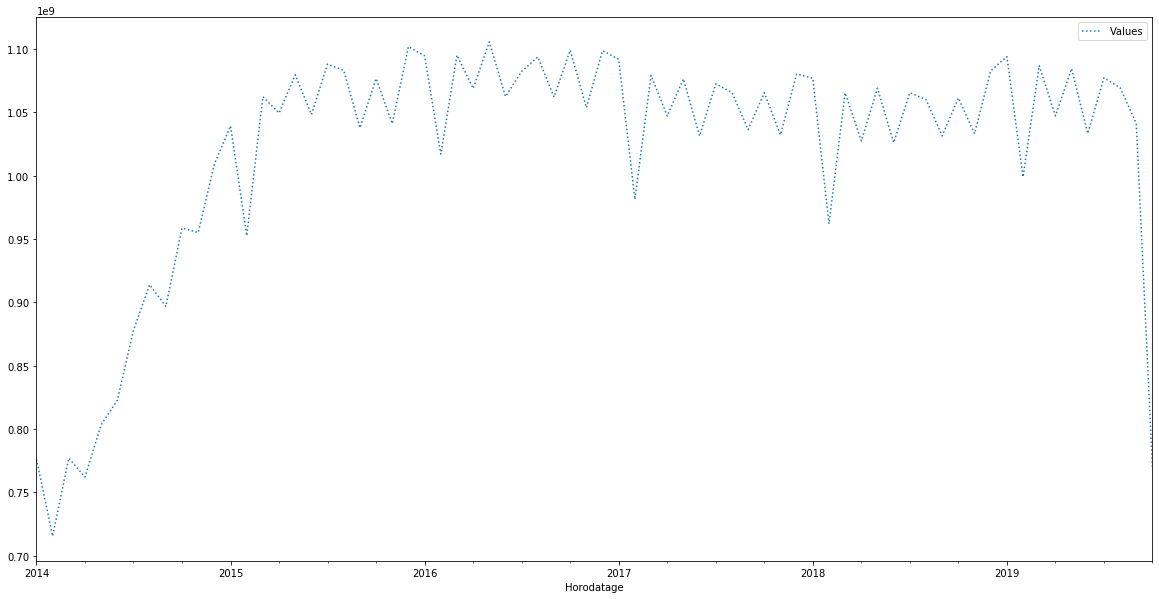

In [12]:
montly = data.resample('M').sum()
montly.plot(style=[':','--','-'],figsize=(20,10))

# Rééchantillonnage des données par semaine

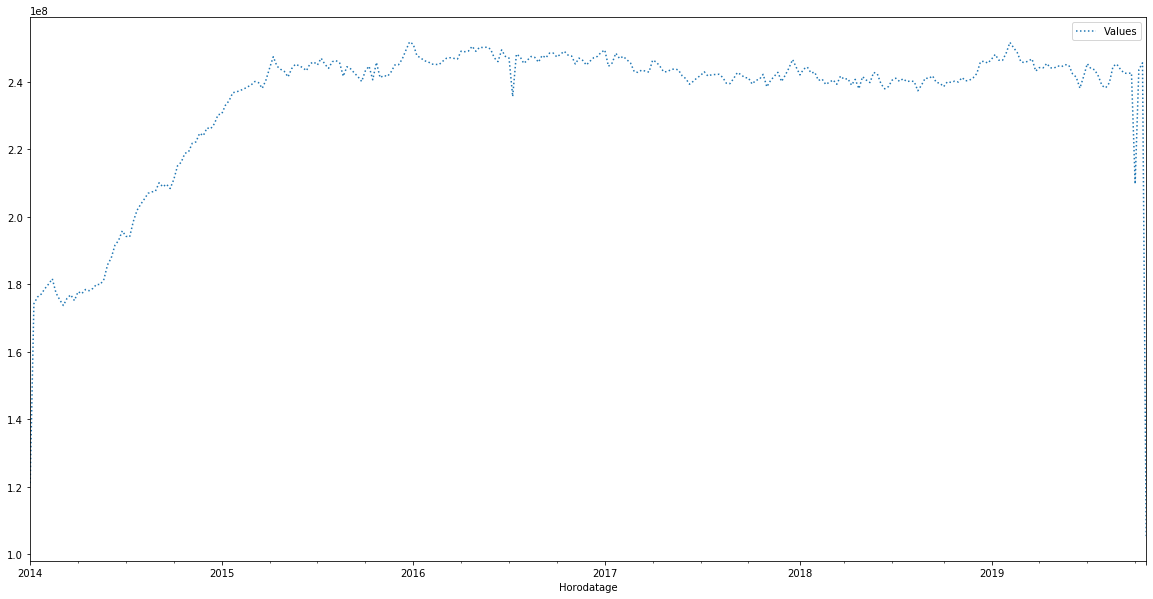

In [13]:
weekly = data.resample('W').sum()
weekly.plot(style=[':','--','-'],figsize=(20,10))

# Rééchantillonnage des données par jour 

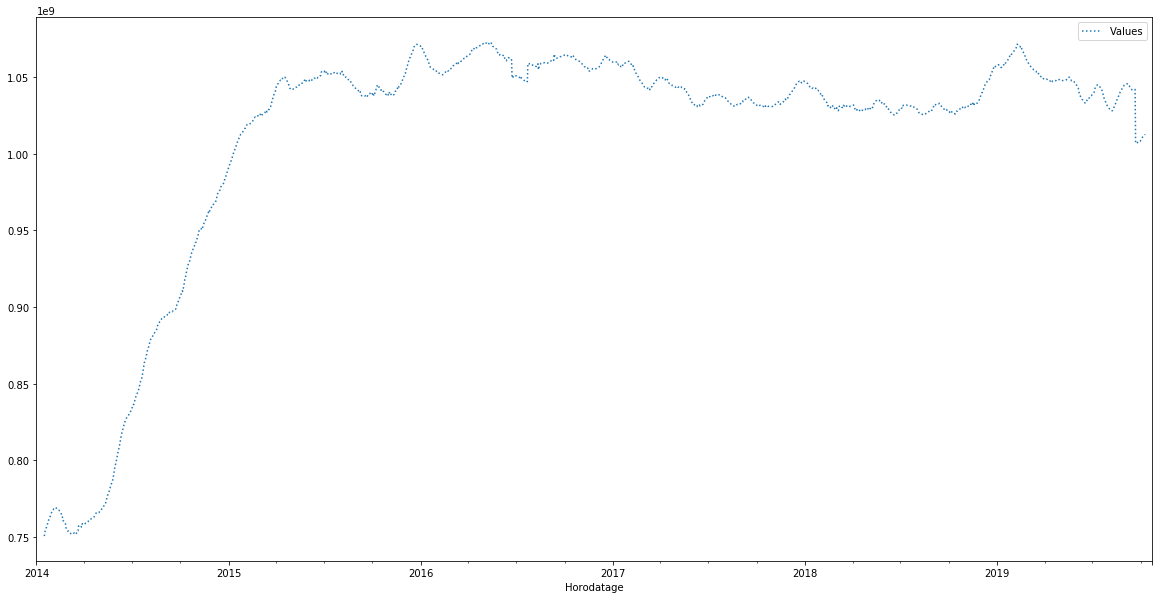

In [14]:
daily = data.resample('D').sum()
daily.rolling(30,center=True).sum().plot(style=[':','--','-'],figsize=(20,10))

# Rééchantillonnage des données par heure 

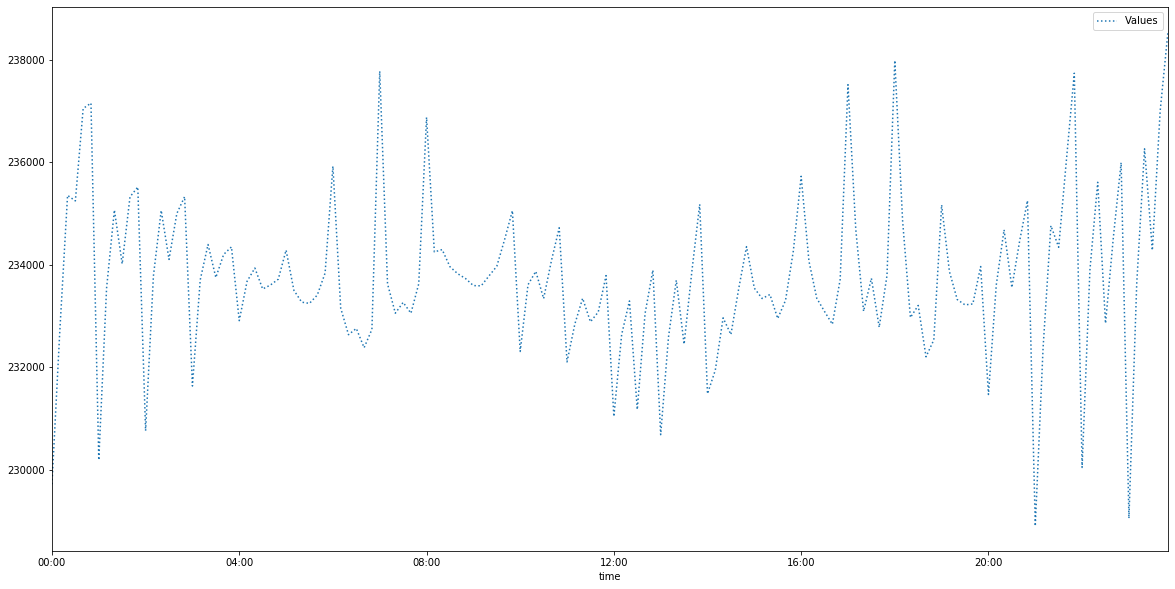

In [15]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4*60*60*np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':','--','-'],figsize=(20,10))

# Rééchantillonnage des données par heures fréquentes

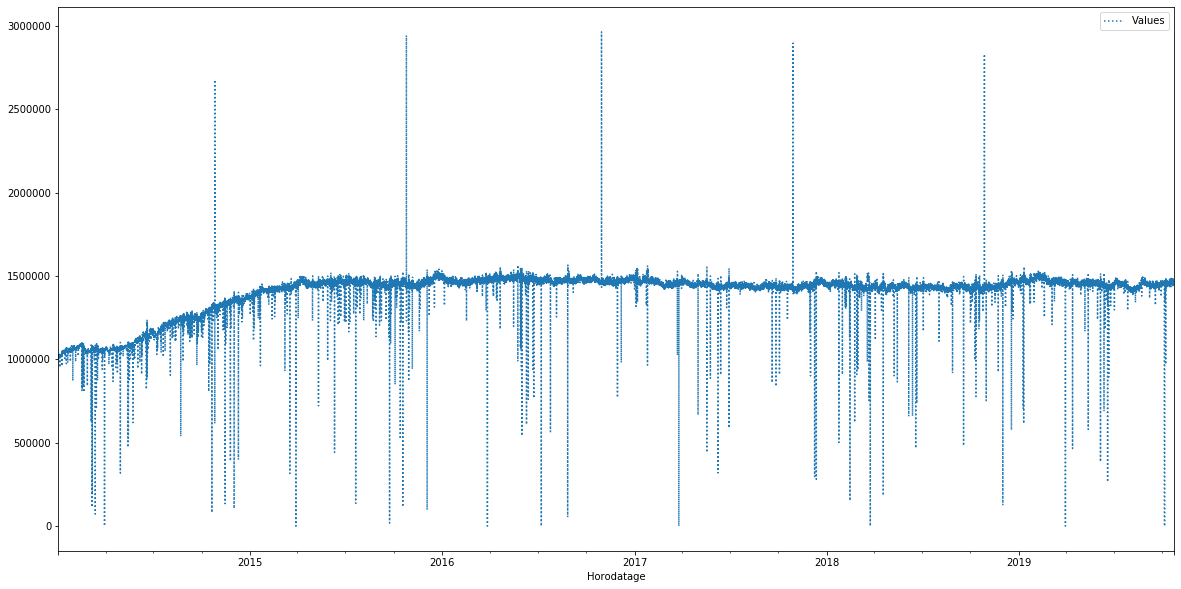

In [16]:
Hour_frequency = data.resample('H').sum()
Hour_frequency.plot(style=[':','--','-'],figsize=(20,10))

# Rééchantillonnage des données par minutes fréquentes

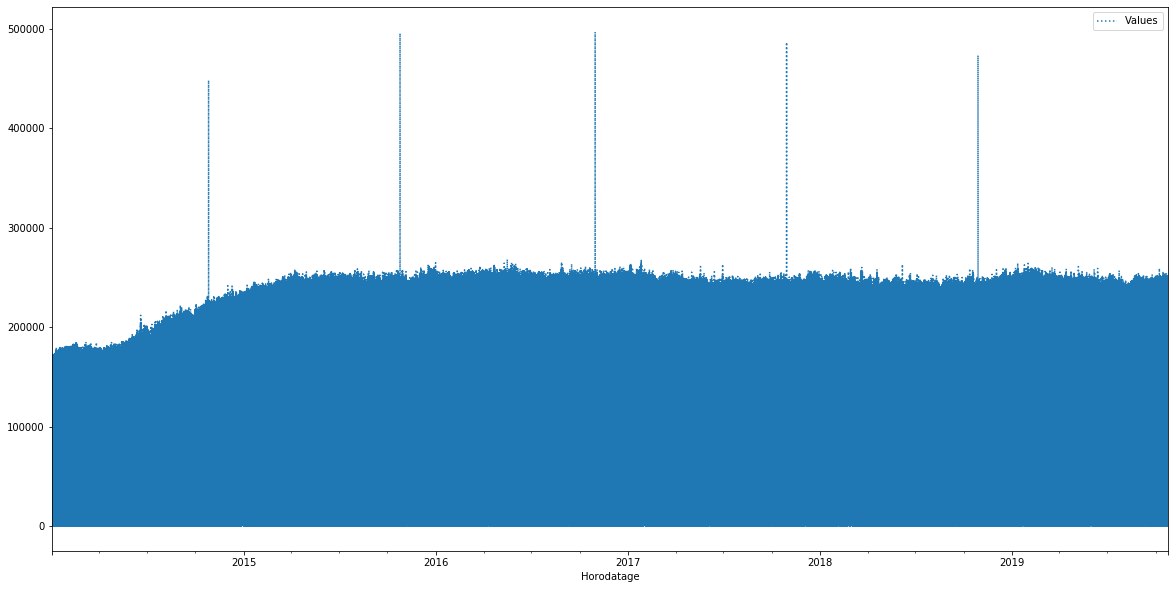

In [17]:
Year_end = data.resample('min').sum()
Year_end.plot(style=[':','--','-'],figsize=(20,10))

# Explorations supplémentaires

In [18]:
df = result.loc[:,['Horodatage','Values']]
df['Values'] = pd.to_numeric(df['Values'],errors='coerce')
df = df.groupby(['Horodatage']).sum().reset_index()
df.head()

,Horodatage,Values
0,2014-01-01 01:00:00,167954
1,2014-01-01 01:10:00,167954
2,2014-01-01 01:20:00,167852
3,2014-01-01 01:30:00,167762
4,2014-01-01 01:40:00,167660


In [167]:
#df.plot.line(x='Horodatage',y='Values',figsize=(20,10), linewidth=5,fontsize=20)

# Analyse de la tendance

In [168]:
#df['Values'].rolling(5).mean().plot(figsize=(20,10),linewidth=5,fontsize=20)
#plt.show()

In [21]:
mon = df['Horodatage']
temp = pd.DatetimeIndex(mon)
month = pd.Series(temp.month)
to_be_plotted = df.drop(['Horodatage'],axis=1)
to_be_plotted = to_be_plotted.join(month)

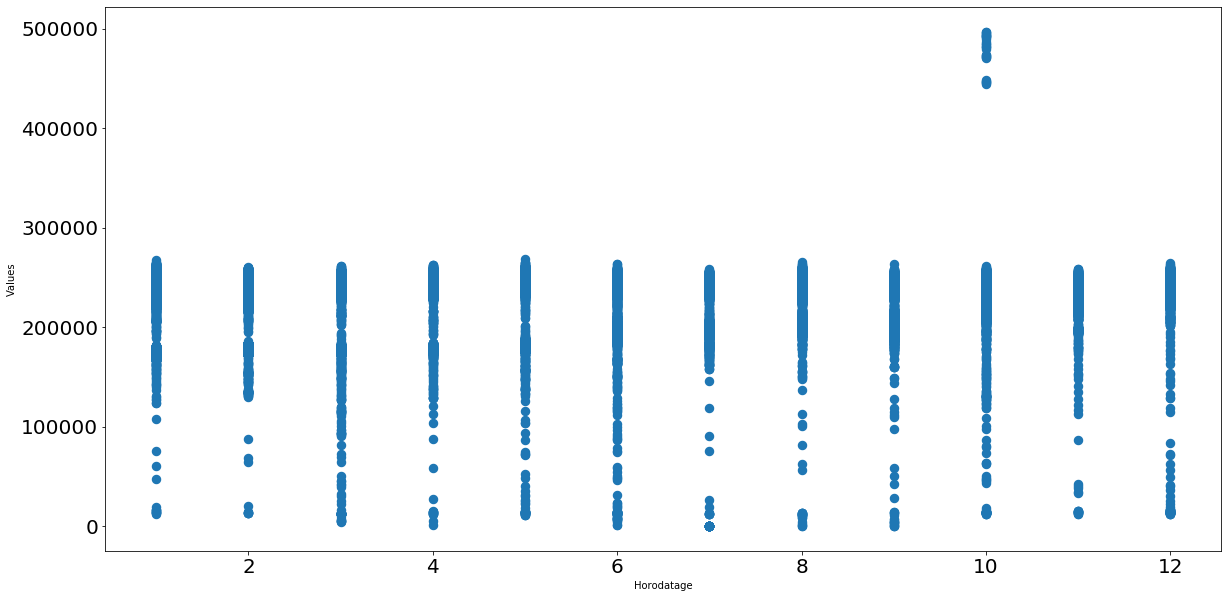

In [22]:
to_be_plotted.plot.scatter(x='Horodatage',y='Values',figsize=(20,10),linewidth=5,fontsize=20)

## Test de corrélation entre les données

In [169]:
#df['Values'].diff(periods=30).plot(figsize=(20,10),linewidth=5,fontsize=20)

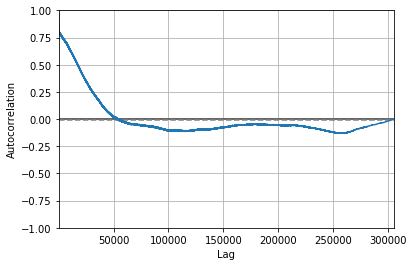

In [24]:
pd.plotting.autocorrelation_plot(df['Values'])

# Clustering de séries temporelles

## Hierarchical Clustering 

In [170]:
raw_data_df = pd.read_csv("data_clustering.csv",delimiter=',')
raw_data_df['Date']=pd.to_datetime(raw_data_df['Horodatage'])
raw_data_df['dy']=raw_data_df['Date'].dt.dayofyear
raw_data_df['heure']=raw_data_df['Date'].dt.time
data__ = raw_data_df.loc[:,['heure','dy','Values']]
temp = raw_data_df.loc[:,['dy','Values']]
data__['Values'] = pd.to_numeric(data__['Values'],errors='coerce')
temp = temp.set_index(data__.heure)
data__['heure'] = data__['heure'].astype(str)
temp = data__.pivot_table(index=[str('heure')],columns=[str('dy')],values=['Values'],fill_value=0)

In [172]:
#data__

## Courbe de valeurs journalier

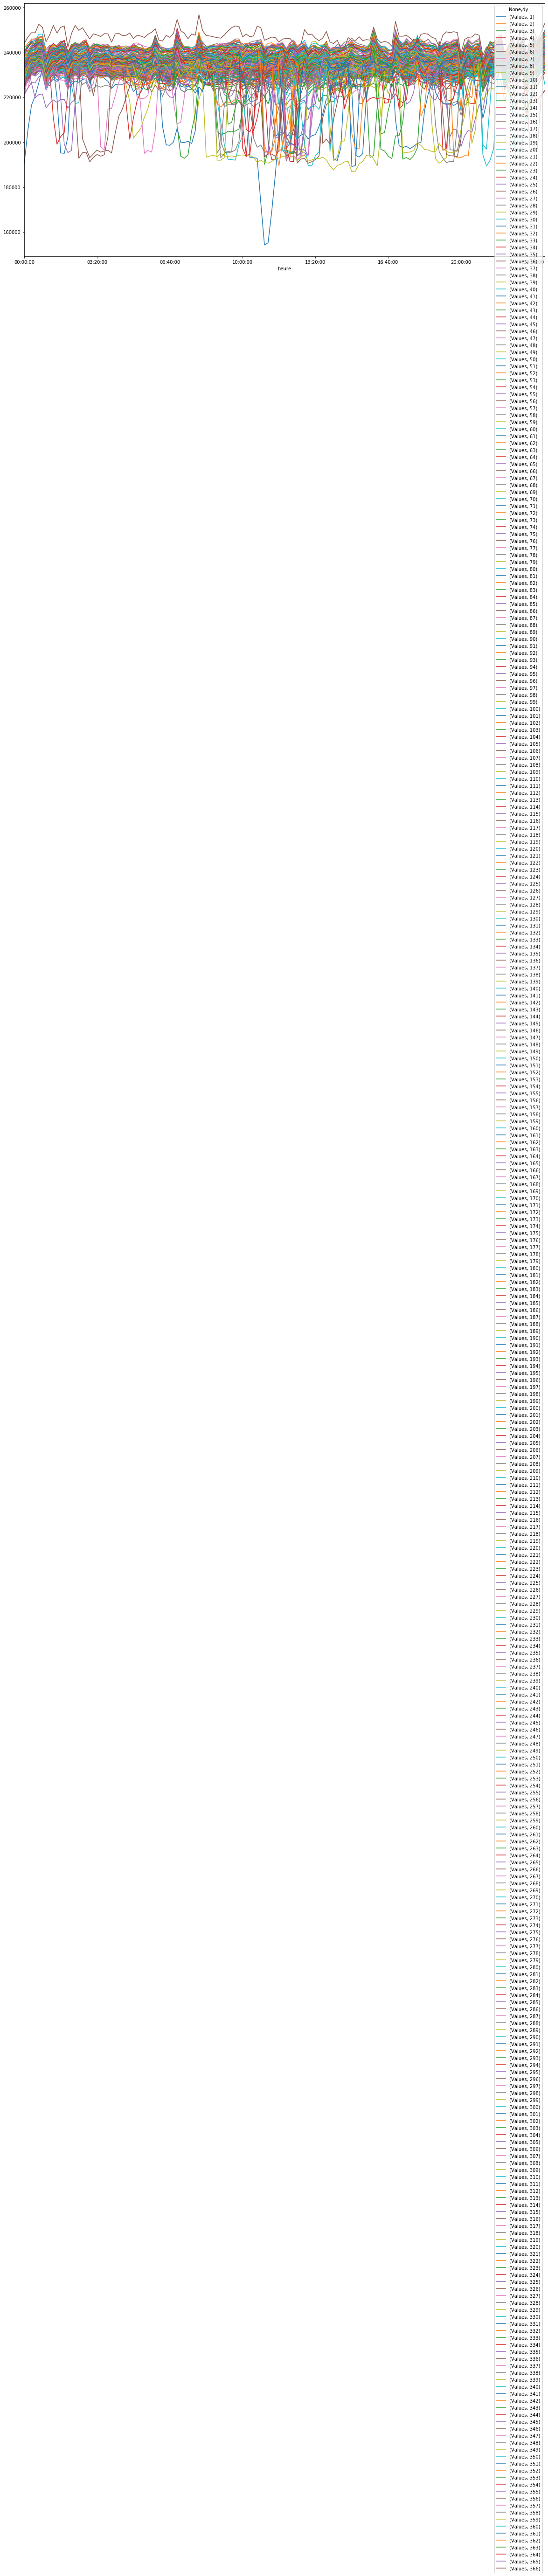

In [27]:
temp.plot(figsize=(20,10))

## Hierarchical Clustering Dendogram

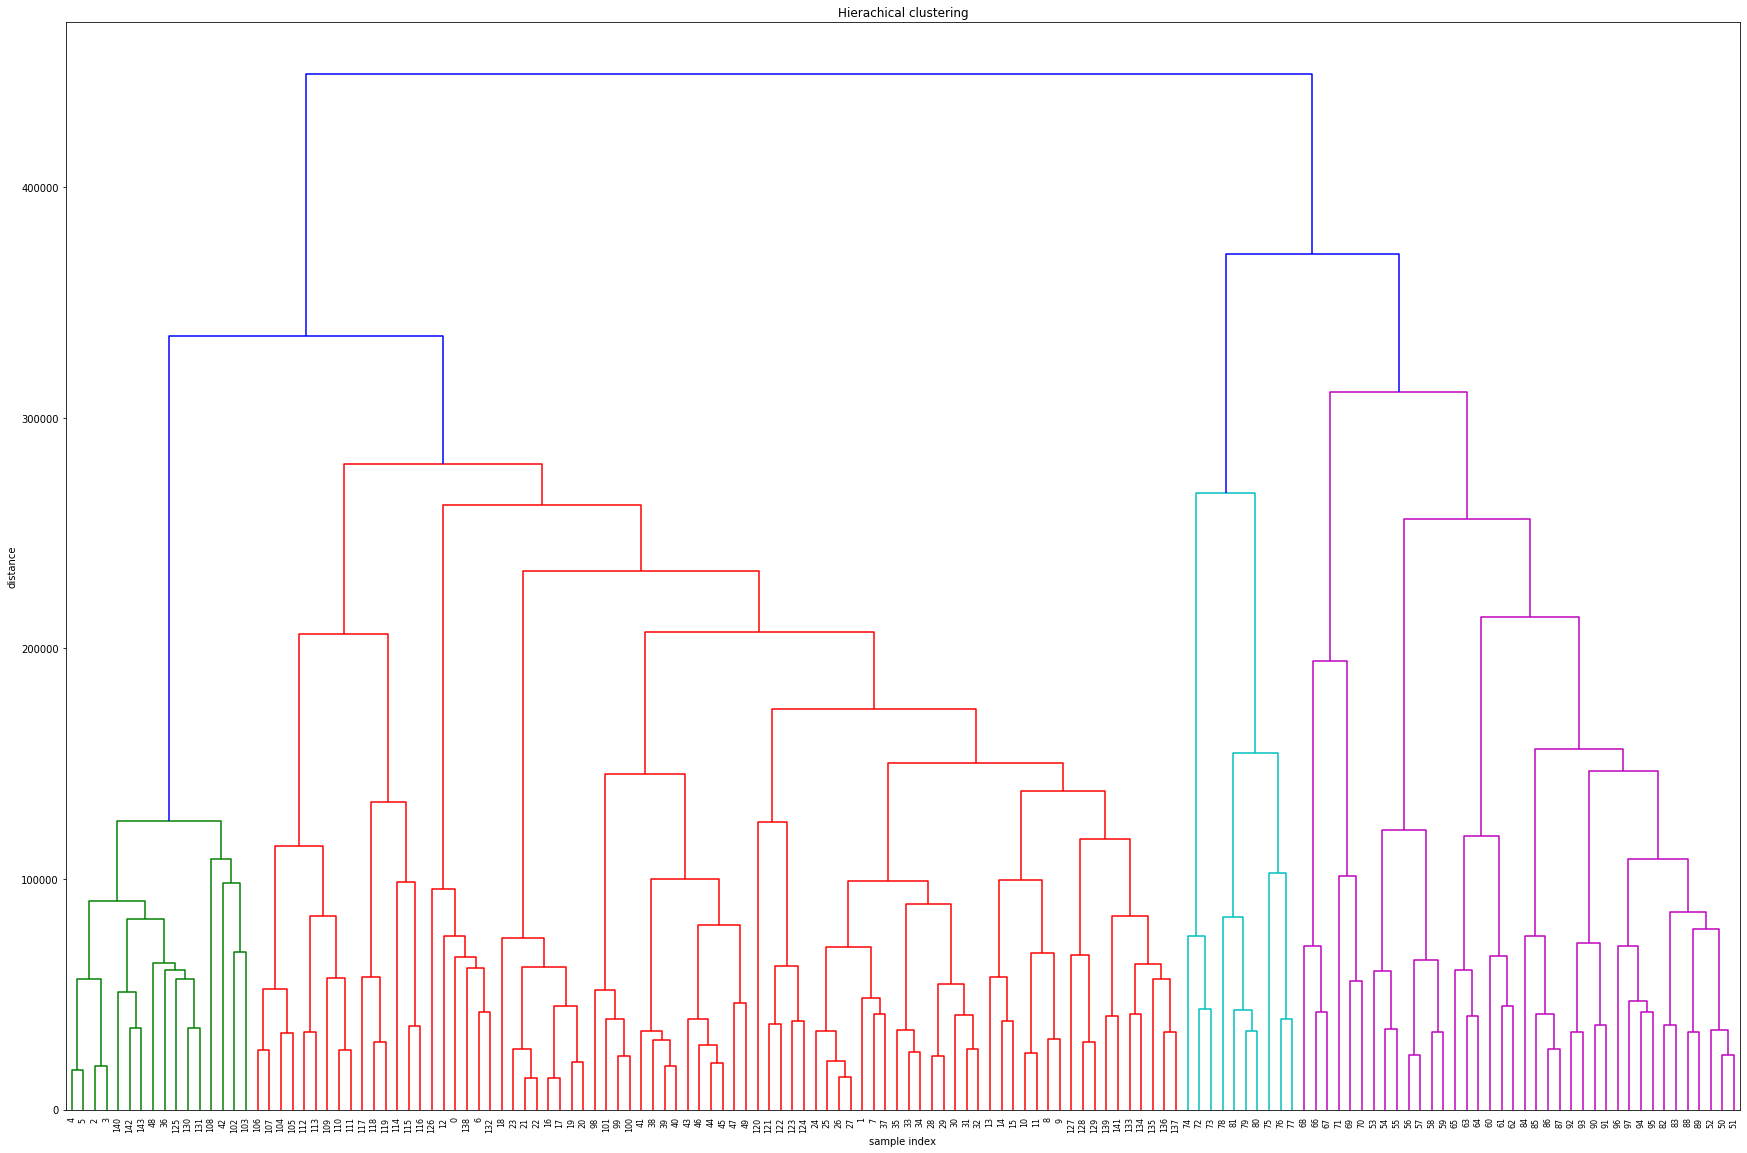

In [28]:
#librairies pour la CAH
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
z = linkage(temp.iloc[:,0:365] ,method='ward',metric='euclidean')
plt.figure(figsize=(30,20))
plt.title('Hierachical clustering')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(z,leaf_rotation=90.,leaf_font_size=8.)
plt.show()

# Clustering K-MEANS

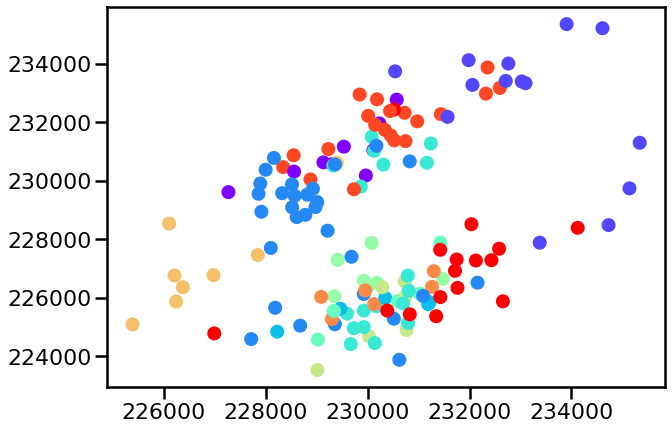

In [154]:
from sklearn.cluster import KMeans
#cluster = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
cluster = KMeans(n_clusters=12)
cluster.fit_predict(temp.iloc[:,0:365])
plt.figure(figsize=(10, 7))
plt.scatter(temp.iloc[:,1], temp.iloc[:,2], c=cluster.labels_, cmap='rainbow')

In [155]:
temp = temp.astype(int, errors='ignore')

For n_clusters = 2, silhouette score is 0.1650238701767161)
For n_clusters = 3, silhouette score is 0.09759591480077633)
For n_clusters = 4, silhouette score is 0.10667324746060404)
For n_clusters = 5, silhouette score is 0.14112546869812445)
For n_clusters = 6, silhouette score is 0.1531915208624791)
For n_clusters = 7, silhouette score is 0.15644385696893845)
For n_clusters = 8, silhouette score is 0.17416691497084505)
For n_clusters = 9, silhouette score is 0.18812531404100793)
For n_clusters = 10, silhouette score is 0.17805296007151783)
For n_clusters = 11, silhouette score is 0.1843518185194519)
For n_clusters = 12, silhouette score is 0.20619315874623698)
For n_clusters = 13, silhouette score is 0.23147770138564105)
For n_clusters = 14, silhouette score is 0.2273502055432647)


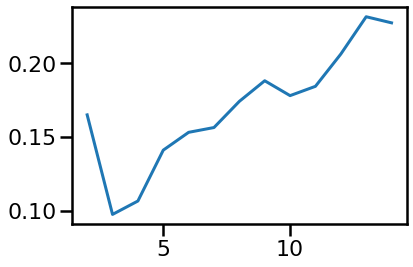

In [156]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

Results = []
Clusters = []
range_n_clusters = list (range(2,15))
for nb_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=nb_clusters)
    preds = clusterer.fit_predict(temp.iloc[:,0:365])
    centers = clusterer.cluster_centers_
    score = silhouette_score(temp.iloc[:,0:365], preds)
    print("For n_clusters = {}, silhouette score is {})".format(nb_clusters, score))
    Results.append(score)
    Clusters.append(nb_clusters)
plt.plot(Clusters,Results)
plt.show()

# Nous pouvons conclure que quand le nombre de clusters est égal à 12, le score est élevé d'où nous avons 12 clusters.

## DBSCAN

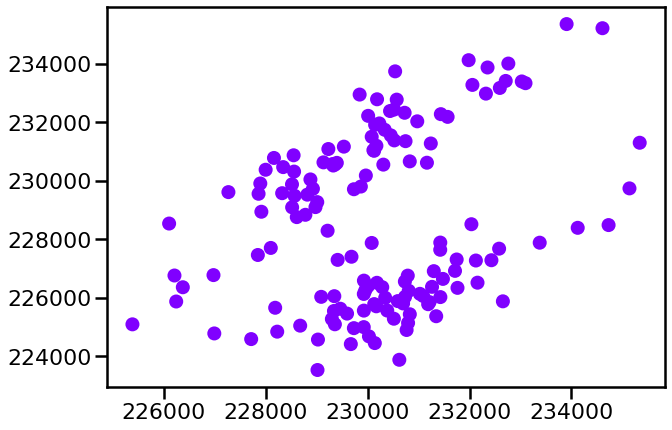

In [163]:
from sklearn.cluster import DBSCAN
#algorithms['dbscan'] = cluster.DBSCAN(eps=0.30, min_samples=9)
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
cluster = DBSCAN(eps=0.30, min_samples=12)
cluster.fit_predict(temp.iloc[:,0:365])
plt.figure(figsize=(10, 7))
plt.scatter(temp.iloc[:,1], temp.iloc[:,2], c=cluster.labels_, cmap='rainbow')

### Nous pouvons conlure que cet algorithme n'arrive pas à former des classes

## Agglomerative Clustering

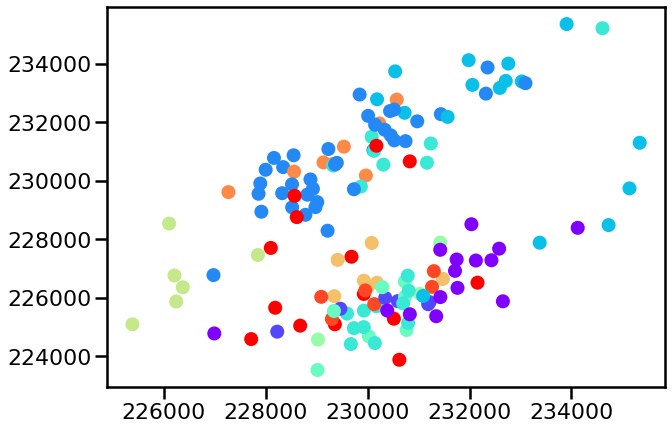

In [157]:
#agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define dataset
cluster = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
cluster.fit_predict(temp.iloc[:,0:365])
plt.figure(figsize=(10, 7))
plt.scatter(temp.iloc[:,1], temp.iloc[:,2], c=cluster.labels_, cmap='rainbow')cluster.fit_predict(temp.iloc[:,0:365])
plt.figure(figsize=(10, 7))
plt.scatter(temp.iloc[:,1], temp.iloc[:,2], c=cluster.labels_, cmap='rainbow')

### Nous pouvons conlure que cet algorithme ne retiens que deux classes ou groupes 

## Affinity Propagation

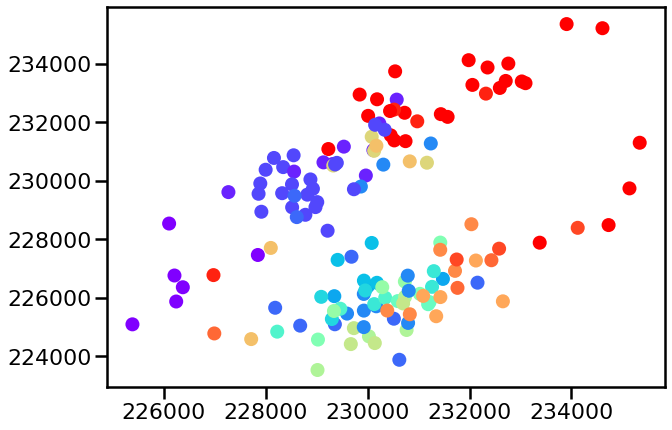

In [159]:
# affinity propagation clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
cluster = AffinityPropagation(damping=0.9)
cluster.fit_predict(temp.iloc[:,0:365])
plt.figure(figsize=(10, 7))
plt.scatter(temp.iloc[:,1], temp.iloc[:,2], c=cluster.labels_, cmap='rainbow')

### Nous pouvons conlure que cet algorithme  retiens douze classes ou groupes 

## SpectralClustering

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


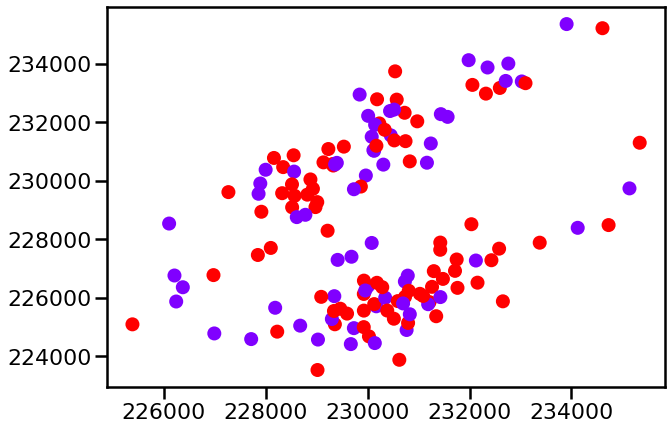

In [165]:
# spectral clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
cluster = SpectralClustering(n_clusters=2)
# define the model
cluster.fit_predict(temp.iloc[:,0:365])
plt.figure(figsize=(10, 7))
plt.scatter(temp.iloc[:,1], temp.iloc[:,2], c=cluster.labels_, cmap='rainbow')

### Nous pouvons conlure que cet algorithme ne retiens que deux classes ou groupes 

# Evaluation des modèles 

In [110]:
from sklearn import cluster
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
G = nx.karate_club_graph()
pos = nx.spring_layout(G)

def graph_to_edge_matrix(G):
    """Convert a networkx graph into an edge matrix.
    See https://www.wikiwand.com/en/Incidence_matrix for a good explanation on edge matrices
   
    Parameters
    ----------
    G : networkx graph
    """
    # Initialize edge matrix with zeros
    edge_mat = np.zeros((len(G), len(G)), dtype=int)

    # Loop to set 0 or 1 (diagonal elements are set to 1)
    for node in G:
        for neighbor in G.neighbors(node):
            edge_mat[node][neighbor] = 1
        edge_mat[node][node] = 1

    return edge_mat
edge_mat = graph_to_edge_matrix(G)
edge_mat
k_clusters = 12
results = []
algorithms = {}
algorithms['kmeans'] = cluster.KMeans(n_clusters=k_clusters, n_init=200)

In [127]:
algorithms['agglom'] = cluster.AgglomerativeClustering(n_clusters=k_clusters, linkage="ward")

In [130]:
algorithms['dbscan'] = cluster.DBSCAN(eps=0.30, min_samples=9)

In [112]:
algorithms['spectral'] = cluster.SpectralClustering(n_clusters=k_clusters, affinity="precomputed", n_init=200)

In [141]:
algorithms['affinity'] = cluster.AffinityPropagation(damping=0.6)

[[7, 5, 8, 5, 0, 0, 0, 5, 11, 9, 0, 2, 2, 5, 4, 4, 0, 2, 4, 2], [11, 0, 9, 0, 3, 3, 3, 0, 7, 6, 3, 2, 2, 0, 4, 4, 3, 2, 4, 2], [4, 5, 0, 9, 3, 7, 7, 5, 10, 0, 3, 2, 9, 4, 1, 1, 7, 5, 1, 4], [0, 2, 2, 2, 1, 1, 1, 2, 4, 3, 1, 1, 2, 2, 4, 4, 1, 2, 4, 4], [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]]


In [ ]:
results_ = []
# Fit all models
for model in algorithms.values():
    model.fit(edge_mat)
    results_.append(list(model.labels_[0:20]))
print(results_)

In [166]:
#nmi_results = []
#ars_results = []
#y_true = list(temp.iloc[:,134])
#print(results_)
# Append the results into lists
#for y_pred in results:
    #nmi_results.append(normalized_mutual_info_score(y_true, y_pred))
    #ars_results.append(adjusted_rand_score(y_true, y_pred))